In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
!ls

 BrainTumor	    Dogs.Cats.zip		    LabelledGalaxies
 C:		    EllipticalLabeled		    SummariesDrive
'Colab Notebooks'   FeaturesAutoEnc.csv		    Tekupppp
'Concours prepa'    FeaturesCNN.csv		    yes
 Data		    GalaxyExtracted		    yes-20231005T133507Z-001.zip
 Data.csv	    images.rar
'documents eya'    'KhaoulaNewDSEN2024 (1).ipynb'


In [ ]:
from IPython.display import display
import re
import os
import glob
from PIL import Image
import numpy as np
import cv2

path = glob.glob('/content/drive/My Drive/yes/*')

Data = []

for filename in path:
    image = cv2.imread(filename)

    if image is not None:
        new_size = (200, 200)
        image_resized = cv2.resize(image, new_size)

        Data.append(image_resized)

Data1 = np.array(Data)

In [ ]:
len(Data)

155

In [ ]:
Data1.shape

(155, 200, 200, 3)

In [ ]:
import os
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

from keras.optimizers import Adam
from keras.utils import plot_model

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
def define_discriminator(in_shape=(28,28,3)):
  model = Sequential()
  model.add(Conv2D(256, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(256, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))


  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
discriminator = define_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       7168      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 256)       0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         590080    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 256)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [ ]:
opt = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, run_eagerly=True)

In [ ]:
def define_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256 * 7 * 7, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 256)))# convert vector to image
    model.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (7, 7), activation='sigmoid', padding='same'))

    return model

In [ ]:
# latent 100 or 500 based on ressources of our PC
generator = define_generator(100)
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 256)       1048832   
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 256)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 256)       1048832   
 Transpose)                                           

In [ ]:
opt = Adam(lr=0.0002, beta_1=0.5)
generator.compile(loss='binary_crossentropy', optimizer=opt, run_eagerly=True)

In [ ]:
def define_gan(g_model , d_model,):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = Adam(lr=0.0002 , beta_1 = 0.5)
  model.compile(loss='binary_crossentropy',optimizer = opt)
  return model

In [ ]:
def load_real_images():
    X = Data1.astype('float32')
    X = X / 255.0
    Y_real = np.ones((X.shape[0], 1))  # Labels real images as 1
    return X, Y_real

In [ ]:
X_real, y_real = load_real_images()

In [ ]:
X_real.shape

(155, 200, 200, 3)

In [ ]:
y_real.shape

(155, 1)

In [ ]:
def generate_real_images(dataset, n_samples):
    i = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[i]
    Y_real = np.ones((n_samples, 1))
    return X, Y_real

In [ ]:
Xreal, yreal = generate_real_images(Data1,155)

In [ ]:
Xreal.shape

(155, 200, 200, 3)

In [ ]:
yreal.shape

(155, 1)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    X = randn(latent_dim * n_samples)
    X = X.reshape(n_samples, latent_dim)
    return X

In [ ]:
def generate_fake_images(model_G, latent_dim, n_samples):
    X_input = generate_latent_points(latent_dim, n_samples)
    X = model_G.predict(X_input)
    y = np.zeros((n_samples, 1))
    return X, y

In [ ]:
x_fake, y_fake = generate_fake_images(generator, 100, 155)

5/5 [==============================] - 175s 20s/step


In [ ]:
x_fake.shape

(155, 200, 200, 3)

In [ ]:
y_fake.shape

(155, 1)

In [ ]:
# def summarize_performance(epoch, model_G, model_D, dataset, latent_dim, n_samples=100):
#     model_G.save('model_' +str(epoch)+ '.h5')
#     X_real, y_real = generate_real_images(dataset, n_samples)
#     _, acc_real = model_D.evaluate(X_real, y_real, verbose=0)
#     x_fake, y_fake = generate_fake_images(model_G, latent_dim, n_samples)
#     _, acc_fake = model_D.evaluate(x_fake, y_fake, verbose=0)
#     print('Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100), end = "\n\n")

In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig('/content/drive/MyDrive/BrainTumor/' + filename)
	pyplot.close()

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	X_real, y_real = generate_real_images(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_images(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save('/content/drive/MyDrive/BrainTumor/' + filename)

In [ ]:
def train_discriminator(model, dataset, n_iter=100, n_batch=310):
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_iter):
        X_real, y_real = generate_real_images(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_images(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
def train_GAN(model_G, model_D, model_GAN, dataset, latent_dim, n_epochs=100, n_batch=310):
    # bat_per_epo = int(dataset.shape[0] / n_batch)
    bat_per_epo = 10
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_images(dataset, half_batch)
            X_fake, y_fake = generate_fake_images(model_G, latent_dim, half_batch)
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            d_loss, _ = model_D.train_on_batch(X, y)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = model_GAN.train_on_batch(X_gan, y_gan)
            print('%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance
        if (i+1) % 10 == 0:
            summarize_performance(i, model_G, model_D, dataset, latent_dim)

    # print("Generated MRI image using GAN")
    # num_samples = 10

    # X_fake, y_fake = generate_fake_images(model_G, latent_dim, num_samples)
    # for i in range(num_samples):
    #     plt.imshow(X_fake[i])
    #     plt.title("Class : "+str(y_fake[i][0]))
    #     plt.show()

In [ ]:
latent_dim =100
discriminator = define_discriminator()
generator = define_generator(latent_dim)
model_GAN = define_gan(generator, discriminator)
dataset=load_real_images()
train_GAN(generator, discriminator,model_GAN,dataset[0], latent_dim)

In [ ]:
# Discriminator Loss (d): Represents the loss of the discriminator model.
# Lower values indicate that the discriminator is getting better at distinguishing between real and fake images.

# Generator Loss (g): Represents the loss of the generator model.
# Lower values indicate that the generator is getting better at generating images that are convincing to the discriminator.

# Accuracy for Real and Fake Images: Indicates how accurately the discriminator is classifying real and fake images.
# For example, "Accuracy real: 100%, fake: 0%" means the discriminator is currently classifying all real images correctly but all fake images incorrectly.


In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0],cmap='gray_r')
	pyplot.show()

# load model
model = load_model('/content/drive/MyDrive/BrainTumor/generator_model_100.h5')
# generate images
latent_points = generate_latent_points(100, 400)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 20)

In [ ]:
X.shape

(400, 28, 28, 3)

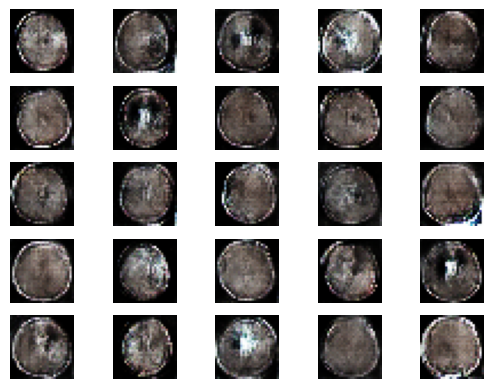

In [ ]:
from matplotlib import pyplot
# plot images from the training dataset
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(X[i], cmap='gray_r')
pyplot.show()

In [ ]:
#NewData=X.reshape(400,28,28)

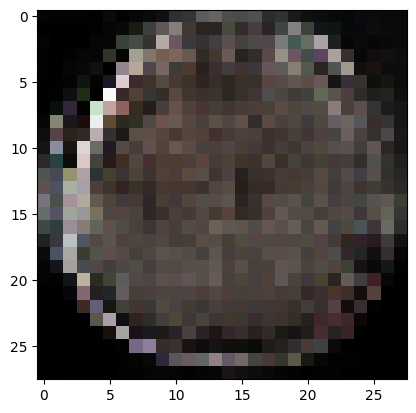

In [ ]:
pyplot.imshow(X[100], cmap='gray_r')

In [ ]:
import os
from keras.models import load_model
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space sequentially
    latent_points = []
    for i in range(n_samples):
        latent_point = randn(latent_dim)
        latent_points.append(latent_point)
    return np.array(latent_points)

# Load the generator model
model = load_model('/content/drive/MyDrive/BrainTumor/generator_model_100.h5')

# Generate images
latent_dim = 100
num_samples = 400
latent_points = generate_latent_points(latent_dim, num_samples)
generated_images = model.predict(latent_points)

# Specify the output directory
output_dir = '/content/drive/MyDrive/fakeImages/'

# Save each generated image separately
os.makedirs(output_dir, exist_ok=True)
for i, image in enumerate(generated_images):
    filename = os.path.join(output_dir, f'generated_image_{i}.png')
    # Assuming the images are in the range [0, 1], rescale them to [0, 255] before saving as PNG
    image = (image * 255).astype('uint8')
    pyplot.imsave(filename, image[:, :, 0], cmap='gray')


13/13 [==============================] - 0s 30ms/step


In [ ]:
import os
import shutil
import random

# Specify the source and destination directories
source_dir = '/content/drive/MyDrive/fakeImages/'
destination_dir = '/content/drive/MyDrive/FAKEimages/'

# Get a list of all files in the source directory
all_files = os.listdir(source_dir)

# Select 155 random files from the source directory
selected_files = random.sample(all_files, 155)

# Move selected files to the destination directory
os.makedirs(destination_dir, exist_ok=True)
for file_name in selected_files:
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    shutil.move(source_path, destination_path)

print("Selected and moved 155 images to the destination directory.")

Selected and moved 155 images to the destination directory.
